<a href="https://colab.research.google.com/github/DiSolo28/ML/blob/main/ML%206%20%D0%BB%D0%B0%D0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Предобработка**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/diamond.csv')

# Определение соответствий для замены Cut
cut_mapping = {'Ideal': 80, 'Good': 30, 'Very Good': 50, 'Fair': 10, 'Signature-Ideal': 100}

# Замена Cut
df['Cut'] = df['Cut'].replace(cut_mapping)

# Определение соответствий для замены Color
color_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6}

# Замена Color
df['Color'] = df['Color'].replace(color_mapping)

# Определение соответствий для замены Clarity
clarity_mapping = {'FL': 10, 'IF': 20, 'VVS1': 30, 'VVS2': 40, 'VS1': 50, 'VS2':60, 'SI1':70}

# Замена Clarity
df['Clarity'] = df['Clarity'].replace(clarity_mapping)

# Определение соответствий для замены Polish
polish_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Polish
df['Polish'] = df['Polish'].replace(polish_mapping)

# Определение соответствий для замены Symmetry
symmetry_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Symmetry
df['Symmetry'] = df['Symmetry'].replace(symmetry_mapping)

# Определение соответствий для замены Report
report_mapping = {'GIA': 1, 'AGSL': 2}

# Замена Report
df['Report'] = df['Report'].replace(report_mapping)

df['Exspensive'] = np.where(df['Price'] >= 30000, 'Exspensive', 'Not')
df.Exspensive = df.Exspensive.astype('object')

<ipython-input-1-1547fe2d9683>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cut'] = df['Cut'].replace(cut_mapping)
<ipython-input-1-1547fe2d9683>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Color'] = df['Color'].replace(color_mapping)
<ipython-input-1-1547fe2d9683>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [2]:
print(df.dtypes)

# Количество уникальных значений
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

Carat Weight    float64
Cut               int64
Color             int64
Clarity           int64
Polish            int64
Symmetry          int64
Report            int64
Price             int64
Exspensive       object
dtype: object
Carat Weight: 196 уникальных значений
Cut: 5 уникальных значений
Color: 6 уникальных значений
Clarity: 7 уникальных значений
Polish: 4 уникальных значений
Symmetry: 4 уникальных значений
Report: 2 уникальных значений
Price: 4821 уникальных значений
Exspensive: 2 уникальных значений


## **Преобразование категориальных фич**

In [3]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Exspensive
0,1.10,80,5,70,3,1,1,5169,Not
1,0.83,80,5,50,2,2,2,3470,Not
2,0.85,80,5,70,1,1,1,3183,Not
3,0.91,80,2,70,3,3,1,4370,Not
4,0.83,80,4,70,1,1,1,3171,Not
...,...,...,...,...,...,...,...,...,...
5995,1.03,80,1,70,1,1,1,6250,Not
5996,1.00,50,1,70,3,3,1,5328,Not
5997,1.02,80,1,70,1,1,1,6157,Not
5998,1.27,100,4,50,1,1,1,11206,Not


In [4]:
# Создаем копию данных
category_columns: list[str] = df.select_dtypes(include=['object']).columns  # Список колонок типа object

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

# Убедимся, что столбец "Exspensive_Not" существует, если требуется его преобразование
if "Exspensive_Not" in df.columns:
    df["Exspensive_Not"] = df["Exspensive_Not"].astype(int)
else:
    print("Столбец 'Exspensive_Not' не найден после кодирования.")

## **Преобразование непрерывных фич**

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
print(df.columns)

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'Exspensive_Not'],
      dtype='object')


In [7]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Exspensive_Not
0,0.162037,0.777778,0.8,1.000000,0.666667,0.000000,0.0,0.030037,1.0
1,0.037037,0.777778,0.8,0.666667,0.333333,0.333333,1.0,0.012941,1.0
2,0.046296,0.777778,0.8,1.000000,0.000000,0.000000,0.0,0.010053,1.0
3,0.074074,0.777778,0.2,1.000000,0.666667,0.666667,0.0,0.021997,1.0
4,0.037037,0.777778,0.6,1.000000,0.000000,0.000000,0.0,0.009932,1.0
...,...,...,...,...,...,...,...,...,...
5995,0.129630,0.777778,0.0,1.000000,0.000000,0.000000,0.0,0.040915,1.0
5996,0.115741,0.444444,0.0,1.000000,0.666667,0.666667,0.0,0.031637,1.0
5997,0.125000,0.777778,0.0,1.000000,0.000000,0.000000,0.0,0.039979,1.0
5998,0.240741,1.000000,0.6,0.666667,0.000000,0.000000,0.0,0.090786,1.0


# **K-means**

In [8]:
! pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):

    # преобразуем X в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

# **K-means через реализацию skelarn**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 3  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")

Статистика по кластерам:

Статистика для признака 'Carat Weight':
             mean       std  min       max
Cluster                                   
0        0.262134  0.215824  0.0  1.000000
1        0.280341  0.227819  0.0  0.953704
2        0.265496  0.206106  0.0  0.958333

Статистика для признака 'Cut':
             mean       std  min       max
Cluster                                   
0        0.454739  0.203816  0.0  0.777778
1        0.634909  0.201583  0.0  1.000000
2        0.746075  0.218554  0.0  1.000000

Статистика для признака 'Color':
             mean       std  min  max
Cluster                              
0        0.541807  0.318674  0.0  1.0
1        0.531102  0.307186  0.0  1.0
2        0.638134  0.293004  0.0  1.0

Статистика для признака 'Clarity':
             mean       std       min  max
Cluster                                   
0        0.806279  0.218246  0.166667  1.0
1        0.752225  0.233391  0.000000  1.0
2        0.719479  0.227448  0.166667  1

## **Анализ кластеров**

**1. Exspensive_Not (не дорогой):**
*   **Кластер 0** состоит исключительно из не дорогих бриллиантов (`mean= 1.0`)
*   **Кластер 1** полностью состоит из дорогих бриллиантов (`mean= 0.0`)
*   **Кластер 2** почти полностью состоит из не дорогих бриллиантов(`mean= 0.906`)


**2. Price (цена)**
*   **Кластер 0** включает в себя больше дешевых бриллиантов (`mean= 6904`)
*   **Кластер 1** является самым дорогим среди других (`mean= 44429`)
*   **Кластер 2** по дороговизне между кластером 0 и кластером 1, но больше дороже (`mean= 22152`)

**Вывод:** Даже малое количество дорогих бриллиантов дает довольно большое среднее значение, что показывает насколько могут сильно изменяться данные если добавить туда немного дорогостоящих бриллиантов.

**3. Clarity (чистота)**
*   **Кластер 0** менее чистый из трех кластеров (`mean= 57`)
*   **Кластер 1** самый чистый по сравнению с кластерами 0 и 2 (`mean= 39`)
*   **Кластер 2** чуть больше чище чем кластер 0 (`mean= 55`)

**Вывод:** Дороговизна бриллианта напрямую решается от их чистоты, чем чище тем дороже и наоборот.

**Коэффициент силуэта для k=3: 0.3349**

Коэффициент силуэта — это метрика для оценки качества кластеризации, показывающая, насколько объекты внутри одного кластера похожи друг на друга и отличаются от объектов в других кластерах.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])

Output()

# **DBSSCAN через sklearn**

Количество кластеров: 3
Статистика по кластерам:

Статистика для признака 'Carat Weight':
             mean       std       min       max  count
Cluster                                               
0        0.243446  0.198023  0.000000  1.000000   5624
1        0.678488  0.105360  0.347222  0.953704    347
2        0.658365  0.116895  0.356481  0.958333     29

Статистика для признака 'Cut':
             mean       std       min  max  count
Cluster                                          
0        0.565296  0.232732  0.000000  1.0   5624
1        0.625360  0.183631  0.222222  1.0    347
2        0.816092  0.143267  0.444444  1.0     29

Статистика для признака 'Color':
             mean       std  min  max  count
Cluster                                     
0        0.564296  0.310155  0.0  1.0   5624
1        0.315850  0.244375  0.0  1.0    347
2        0.324138  0.269464  0.0  0.8     29

Статистика для признака 'Clarity':
             mean       std       min       max  count
Clu

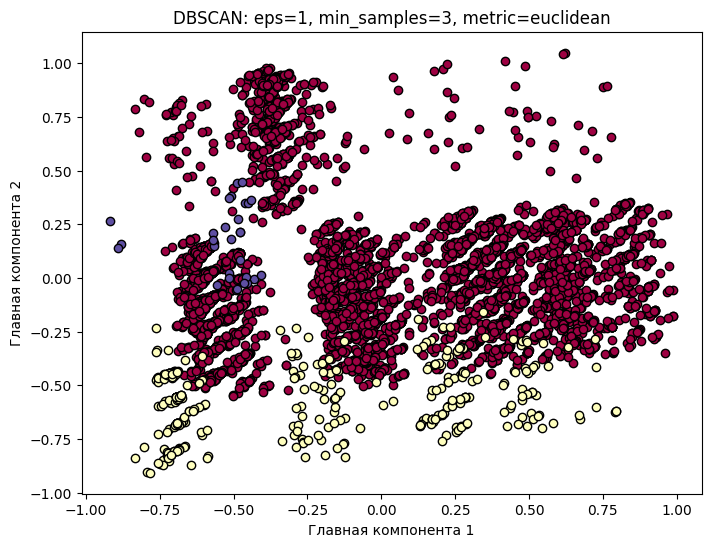

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 1
min_samples = 3
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

## **Анализ кластеров**

После применения алгоритма DBSCAN мы получили два кластера, между которыми наблюдаются существенные различия по некоторым признакам. Рассмотрим три наиболее значимых признака:

**1. Expensive_Not:**

Кластеры 1 и 2 полностью состоят из дорогих бриллиантов чья стоимость 30тыс и выше. Кластер 0 наоборот состоит из дешевых бриллиантов.

**2. Carat Weight**

Кластер 0 очевидно будет с самым маленьким каратом, а кластеры 1 и 2 сильно друг от друга не отличаются в значениях и также у них большие караты.

**3. Color**

Также как у веса карата кластер 0 менее чистый, а кластеры 1 и 2 с более чистым цветом бриллиантов.

In [13]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 2092.3487
Индекс Дэвиса-Болдина для K-means: 1.2898
Коэффициент силуэта для K-means: 0.3183


In [14]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")

Индекс Калински-Харабаза для DBSCAN: 1173.9047
Индекс Дэвиса-Болдина для DBSCAN: 1.1274
Коэффициент силуэта для DBSCAN: 0.3348


## **Визуальный пример**

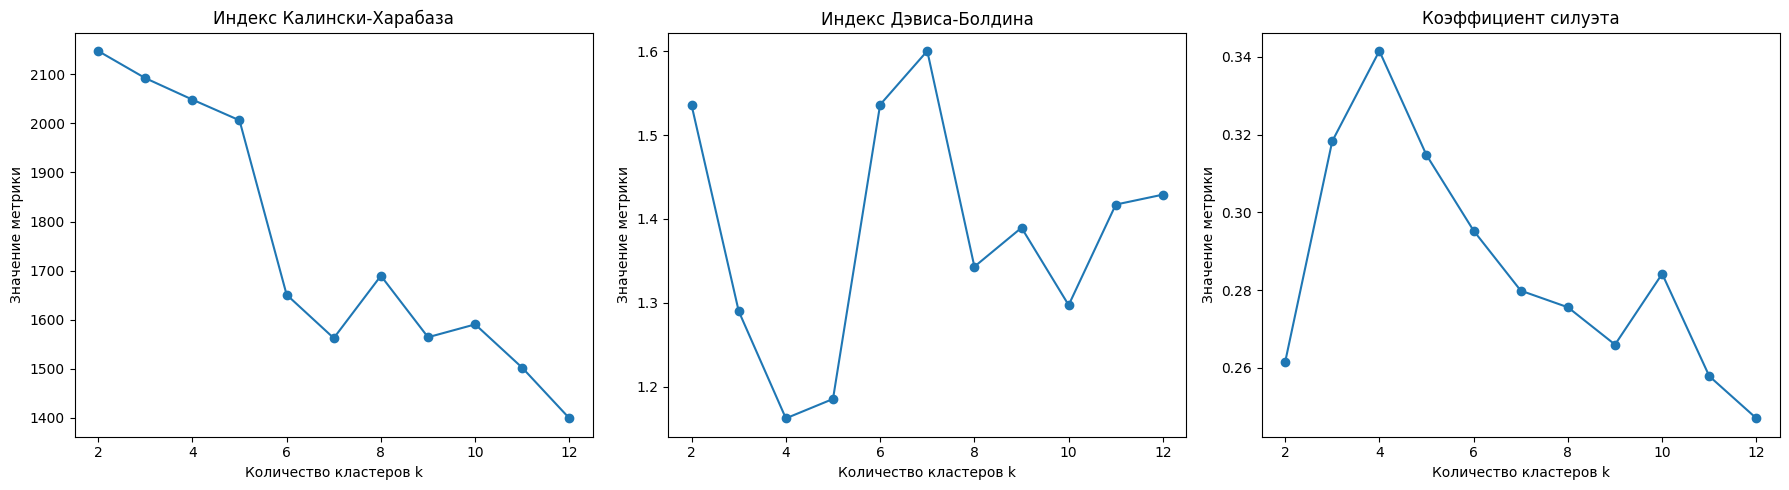

In [15]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()